# **PCOS Prediction using Machine Learning**

This documents the end-to-end process of building a predictive model for PCOS diagnosis. 
It covers data loading, preprocessing, exploratory data analysis, feature engineering, preparing the data for machine learning algorithms and finally, training and testing the models.

### **Loading Dataset**

The dataset is loaded using the 'pandas' library, which provides efficient functions to read data from various file formats. Two separate datasets are imported:  

1. **'PCOS_infertility.csv'**: This dataset contains information related to patients with infertility issues.   
2. **'PCOS_data_without_infertility.xlsx'**: This dataset includes patient details without specific infertility issues. 

These datasets are used for further preprocessing and analysis.

In [197]:
import pandas as pd # For data manipulation

# Load the infertile dataset from a CSV file
infertile = pd.read_csv('PCOS_infertility.csv')

# Load the dataset without infertility data from an Excel file
without_infertile = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

### **Observe datasets**

The 'head()' function provides a preview of the first few rows of the dataset, showing its structure and sample data.\
The 'shape' attribute reveals the dimensions of the dataset, indicating the number of rows and columns.

In [199]:
infertile.head() # Display the first few rows

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [200]:
infertile.shape # To view the dimensions

(541, 6)

In [201]:
without_infertile.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [202]:
without_infertile.shape

(541, 45)

### **Merge Datasets**

The two datasets are merged to create a comprehensive dataset for PCOS diagnosis. Since PCOS may or may not directly cause infertility, combining the fertility and infertility data ensures a wholesome analysis, focusing only on PCOS.  

The merge is performed on the common column 'Patient File No.' using the 'pd.merge()' function, with a left join to retain all rows from the 'without_infertile' dataset and add matching columns from the 'infertile' dataset. 

The suffixes are used to distinguish overlapping column names.

In [204]:
# Merge the two datasets on 'Patient File No.' column
dataset = pd.merge(without_infertile, infertile, on='Patient File No.', suffixes=('', '_wo'), how='left')

### **Understanding the dataset**

Once again the 'head()' function and 'shape' attributes are used to understand the structure and dimensions of the combined dataset.

In [206]:
dataset.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_wo,PCOS (Y/N)_wo,I beta-HCG(mIU/mL)_wo,II beta-HCG(mIU/mL)_wo,AMH(ng/mL)_wo
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
dataset.shape

(541, 50)

### **Check for Imbalances**

The target variable 'PCOS (Y/N)' is analyzed to check the distribution of the two classes (Yes and No). The 'value_counts()' function calculates the count of each class, and the percentage distribution is taken to understand the dataset's balance.  

Then a bar plot is created using the 'seaborn' library to visually present the class distribution, highlighting any imbalance between the two categories. This step ensures awareness of potential biases in the dataset, which can impact model performance.

In [209]:
# Define the target column for PCOS diagnosis (Y/N)
target_column = 'PCOS (Y/N)'

# Get the count of each class (0 or 1) in the target column
class_distribution = dataset[target_column].value_counts()

print("Class Distribution:")
print(class_distribution)
print("\nClass Distribution Percentage:")
print(class_distribution / len(dataset) * 100)

Class Distribution:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

Class Distribution Percentage:
PCOS (Y/N)
0    67.28281
1    32.71719
Name: count, dtype: float64


/var/folders/7j/gg3mw2_55k302y_f8p9rzrqm0000gn/T/ipykernel_69640/1805316325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=dataset, palette='viridis')
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


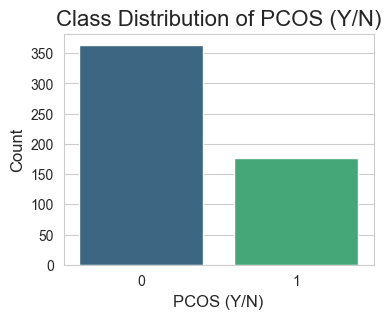

In [210]:
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For visualization

# Plot the class distribution as a bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x=target_column, data=dataset, palette='viridis')

# Add labels and title
plt.title(f'Class Distribution of {target_column}', fontsize=16)
plt.xlabel(target_column, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### **Observations**
The dataset is somewhat imbalanced, with a higher number of samples in the 'No PCOS' class compared to the 'Yes PCOS' class. This imbalance can lead to biased models that favor the majority class. Therefore, it is crucial to handle this imbalance effectively to improve the model's performance and generalization.

### **How to Deal with Imbalanced Dataset**

**Use the Right Evaluation Metrics**

'Accuracy' alone will not be a reliable indicator of model performance when dealing with imbalanced datasets. In such cases, the model might simply predict the majority class most of the time and still achieve high accuracy, even though it fails to predict the minority class effectively.
   
Instead, it is better to use a combination of the following metrics:
   
1. Precision
2. Specificity
3. Recall (Sensitivity)
4. F1 Score

In [212]:
dataset.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo',
       '  I   beta-HCG(mIU/mL)_wo', 'II    beta-HCG(mIU/mL)_wo',
       'AMH(ng/mL)

### **Drop unncessary columns**

To clean the dataset, it’s important to drop unnecessary columns that do not contribute to the model or analysis. This includes duplicate or empty columns that may skew the results.

In [214]:
dataset =dataset.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [215]:
dataset.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [216]:
dataset.shape

(541, 44)

### **Renaming the target variable**

Renaming the target variable helps improve clarity and consistency in the dataset. It makes it more descriptive and easier to understand.

In [218]:
dataset = dataset.rename(columns={"PCOS (Y/N)": "PCOS Diagnosis"}) # Renaming the target column for clarity

### **Dropping columns unnecessary  for analysis**

To streamline the dataset and focus on relevant features, columns that are not needed for analysis should be dropped. 

In [220]:
dataset = dataset.drop(["Sl. No", "Patient File No.", "Marraige Status (Yrs)"], axis=1)

### **View Datatypes and Information of the Columns**

To verify the datatypes and check the distribution of numerical and categorical columns, the 'info()' function is used. This provides an overview of the dataset, including the data type of each column and the number of non-null entries.

In [222]:
dataset.info(verbose=True, show_counts=False) # Displaying detailed information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   PCOS Diagnosis          int64  
 1    Age (yrs)              int64  
 2   Weight (Kg)             float64
 3   Height(Cm)              float64
 4   BMI                     float64
 5   Blood Group             int64  
 6   Pulse rate(bpm)         int64  
 7   RR (breaths/min)        int64  
 8   Hb(g/dl)                float64
 9   Cycle(R/I)              int64  
 10  Cycle length(days)      int64  
 11  Pregnant(Y/N)           int64  
 12  No. of aborptions       int64  
 13    I   beta-HCG(mIU/mL)  float64
 14  II    beta-HCG(mIU/mL)  object 
 15  FSH(mIU/mL)             float64
 16  LH(mIU/mL)              float64
 17  FSH/LH                  float64
 18  Hip(inch)               int64  
 19  Waist(inch)             int64  
 20  Waist:Hip Ratio         float64
 21  TSH (mIU/L)             float64
 22  AM

### **Observation: Columns with dtype - Object**

There are two columns with the datatype object, which typically indicates that they contain non-numeric values, possibly strings or mixed data types. It is important to inspect these columns separately to understand their content and determine if any data cleaning or conversion is necessary.

In [224]:
dataset["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [225]:
dataset["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

Since both columns 'II beta-HCG(mIU/mL)' and 'AMH(ng/mL)' are supposed to be numerical but have an object datatype, they need to be converted to float for proper analysis and modeling.

In [227]:
# Converting columns to numeric values, invalid parsing will be set as NaN
dataset["AMH(ng/mL)"] = pd.to_numeric(dataset["AMH(ng/mL)"], errors='coerce')
dataset["II    beta-HCG(mIU/mL)"] = pd.to_numeric(dataset["II    beta-HCG(mIU/mL)"], errors='coerce')

### **Checking for missing values**

This helps ensure that the dataset is clean before further analysis. To identify any missing or null values in the dataset, we can use the 'isnull()' function followed by 'sum()' to count the number of missing values in each column.

In [229]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Display missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Print the columns with missing values
missing_columns = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(missing_columns)

Missing Values in Each Column:
PCOS Diagnosis            0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmH

### **Handling Missing Values**

There are several methods available to handle missing values in a dataset.

1. **Remove Rows**\
This method involves deleting rows with missing values, but it may result in a loss of valuable data.

2. **Substitute with Median**\
For numerical variables, missing values can be replaced with the median of the respective column.

3. **Substitute with Mode**\
For categorical variables, missing values can be replaced with the mode (most frequent value) of the respective column.

Chosen Methods for columns identified:
- Marriage Status (Yrs): Numeric - Substitute with median.
- AMH (ng/mL): Numeric - Substitute with median.
- II Beta-HCG (mIU/mL): Numeric - Substitute with median.
- Fast Food (Y/N): Categorical - Substitute with mode.

In [231]:
# Filling missing values in 'Fast food (Y/N)' column with the mode 
dataset['Fast food (Y/N)'] = dataset['Fast food (Y/N)'].fillna(dataset['Fast food (Y/N)'].mode()[0])

In [232]:
# Filling missing values in specified columns with the median of each column
columns_to_substitute = ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

for column in columns_to_substitute:
    dataset[column] = dataset[column].fillna(dataset[column].median())

In [233]:
# Check if the missing values have been handled
print("Missing Values After Imputation:")
print(dataset.isnull().sum())

Missing Values After Imputation:
PCOS Diagnosis            0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (m

### **Dividing Columns into Numerical and Categorical**

Since all columns are either of 'float' or 'int' type, we need to manually divide them into numerical and categorical columns based on their nature. Numerical columns are those that represent continuous or discrete values, while categorical columns represent categories or labels.

In [235]:
numerical_columns = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 
    'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions', 
    '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 
    'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 
    'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

categorical_columns = [
    'PCOS Diagnosis', 'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

In [236]:
dataset[numerical_columns].shape

(541, 31)

In [237]:
dataset[categorical_columns].shape

(541, 10)

### **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is the process of analyzing a dataset to summarize its main characteristics, often using visual methods. It helps identify patterns, detect outliers, and understand relationships between variables, providing valuable insights for further analysis and modeling.

### **Identifying Outliers**

Outliers are extreme values that can distort the results of data analysis and modeling. 

One common method to detect outliers is by calculating the **Z-score**, which measures how many standard deviations a data point is from the mean. A Z-score greater than 3 or less than -3 typically indicates an outlier.

They can also be visualised using boxplots.

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calculate Z-scores for each numerical column
z_scores = dataset[numerical_columns].apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Display the outliers
print("Outliers (Z-score > 3 or < -3):")
print(outliers.sum())  

Outliers (Z-score > 3 or < -3):
 Age (yrs)                 1
Weight (Kg)                3
Height(Cm)                 2
BMI                        4
Pulse rate(bpm)            2
RR (breaths/min)           3
Hb(g/dl)                   8
Cycle(R/I)                 0
Cycle length(days)         9
No. of aborptions         13
  I   beta-HCG(mIU/mL)     9
II    beta-HCG(mIU/mL)     3
FSH(mIU/mL)                1
LH(mIU/mL)                 1
FSH/LH                     2
Hip(inch)                  3
Waist(inch)                3
Waist:Hip Ratio            0
TSH (mIU/L)                9
AMH(ng/mL)                 6
PRL(ng/mL)                 9
Vit D3 (ng/mL)             2
PRG(ng/mL)                 2
RBS(mg/dl)                 4
BP _Systolic (mmHg)        3
BP _Diastolic (mmHg)       3
Follicle No. (L)           6
Follicle No. (R)           6
Avg. F size (L) (mm)       8
Avg. F size (R) (mm)       5
Endometrium (mm)           6
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/

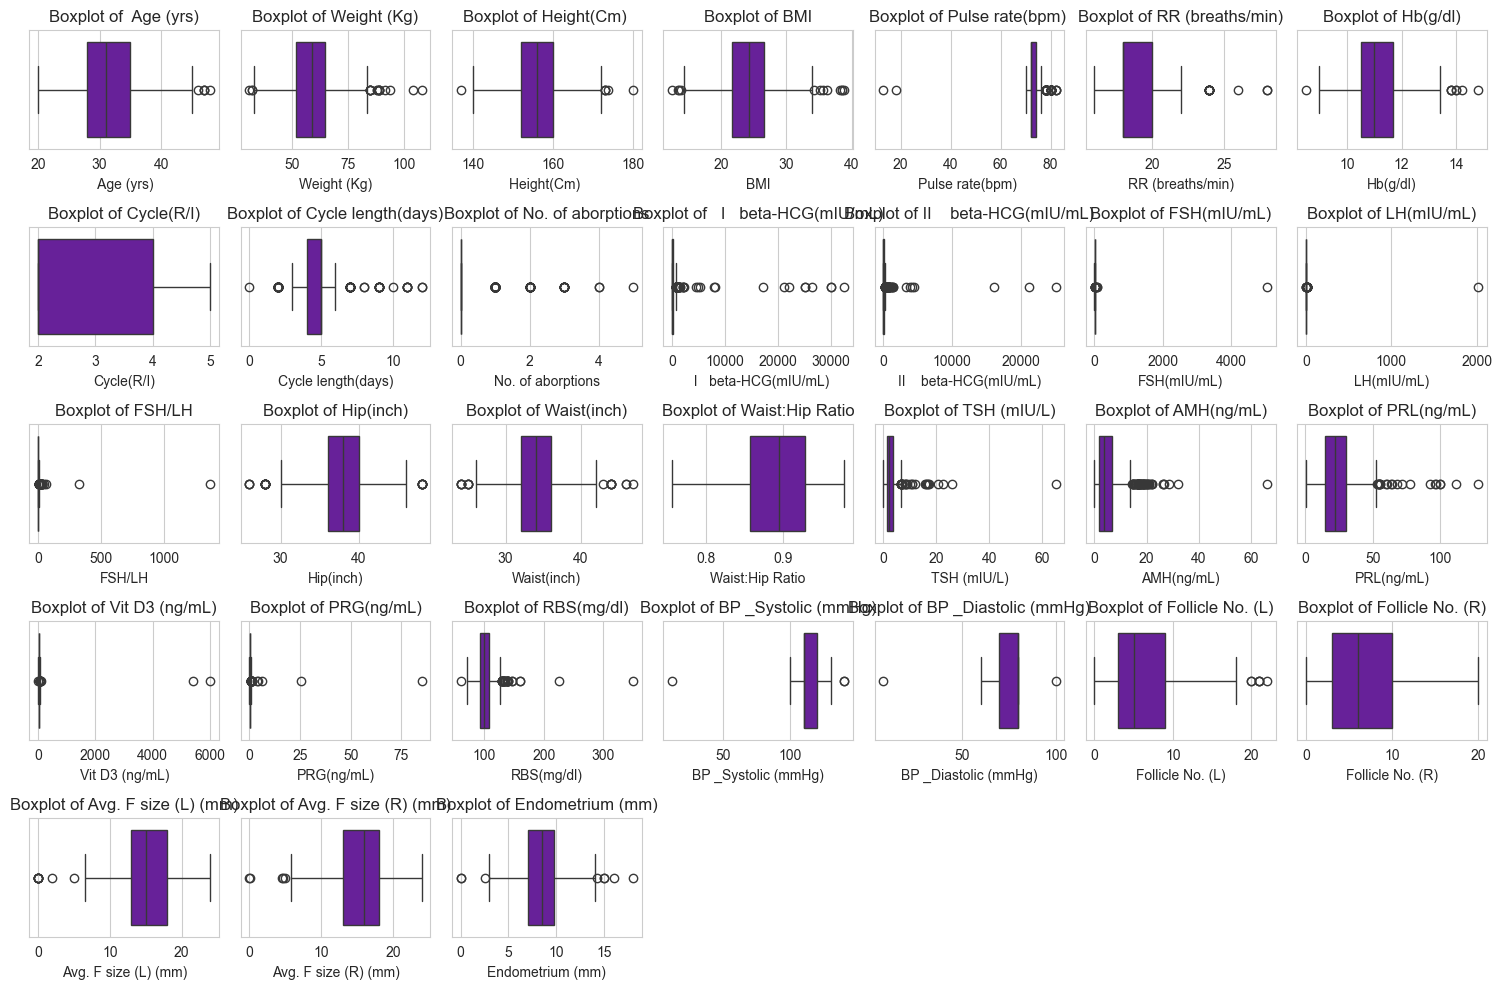

In [241]:
# Plot box plots for the numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 7, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

### Observation and Handling of Outliers

The outliers identified in the dataset were flagged using the Z-score method. However, the decision was made not to handle these outliers. 

**Reason for not handling outliers**:  
In medical records, extreme values are not always considered errors. Instead, they may indicate specific conditions or anomalies related to the patient's health. In such cases, these outliers can provide valuable insights into the patient's condition and should not be removed as outliers in medical data can be meaningful rather than erroneous (Adla et al., 2021).

### **Univariate Analysis**

Univariate analysis involves examining the distribution and summary statistics of individual variables. 
For numerical variables, summary statistics help understand the central tendency and spread of the data, while for categorical variables, we analyze the frequency distribution.

### **Summary Statistics for Numerical Variables**

Summary statistics provide insights into the distribution of numerical features, such as mean, median, standard deviation, minimum, and maximum values. 

In [245]:
# Summary statistics for the numerical columns
summary_statistics = dataset[numerical_columns].describe().T # T transposes the DataFrame.

# Display the summary statistics
print("Summary Statistics for Numerical Columns:")
summary_statistics

Summary Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
Age (yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000
Cycle(R/I),541.0,2.560074,0.901950,2.000000,2.000000,2.000000,4.000000,5.000000
Cycle length(days),541.0,4.940850,1.492020,0.000000,4.000000,5.000000,5.000000,12.000000
No. of aborptions,541.0,0.288355,0.692575,0.000000,0.000000,0.000000,0.000000,5.000000


### **Distribution of Categorical Variables with Bar Plots**

For categorical variables, we can display their frequency distribution using bar plots.

Categorical Column Distributions:

PCOS Diagnosis Distribution:
PCOS Diagnosis
0    364
1    177
Name: count, dtype: int64

Blood Group Distribution:
Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64

Pregnant(Y/N) Distribution:
Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64

Weight gain(Y/N) Distribution:
Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64

hair growth(Y/N) Distribution:
hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64

Skin darkening (Y/N) Distribution:
Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64

Hair loss(Y/N) Distribution:
Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64

Pimples(Y/N) Distribution:
Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64

Fast food (Y/N) Distribution:
Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64

Reg.Exercise(Y/N) Distribution:
Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: 

/var/folders/7j/gg3mw2_55k302y_f8p9rzrqm0000gn/T/ipykernel_69640/2929626796.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col], palette='Set2')
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/var/folders/7j/gg3mw2_55k302y_f8p9rzrqm0000gn/T/ipykernel_69640/2

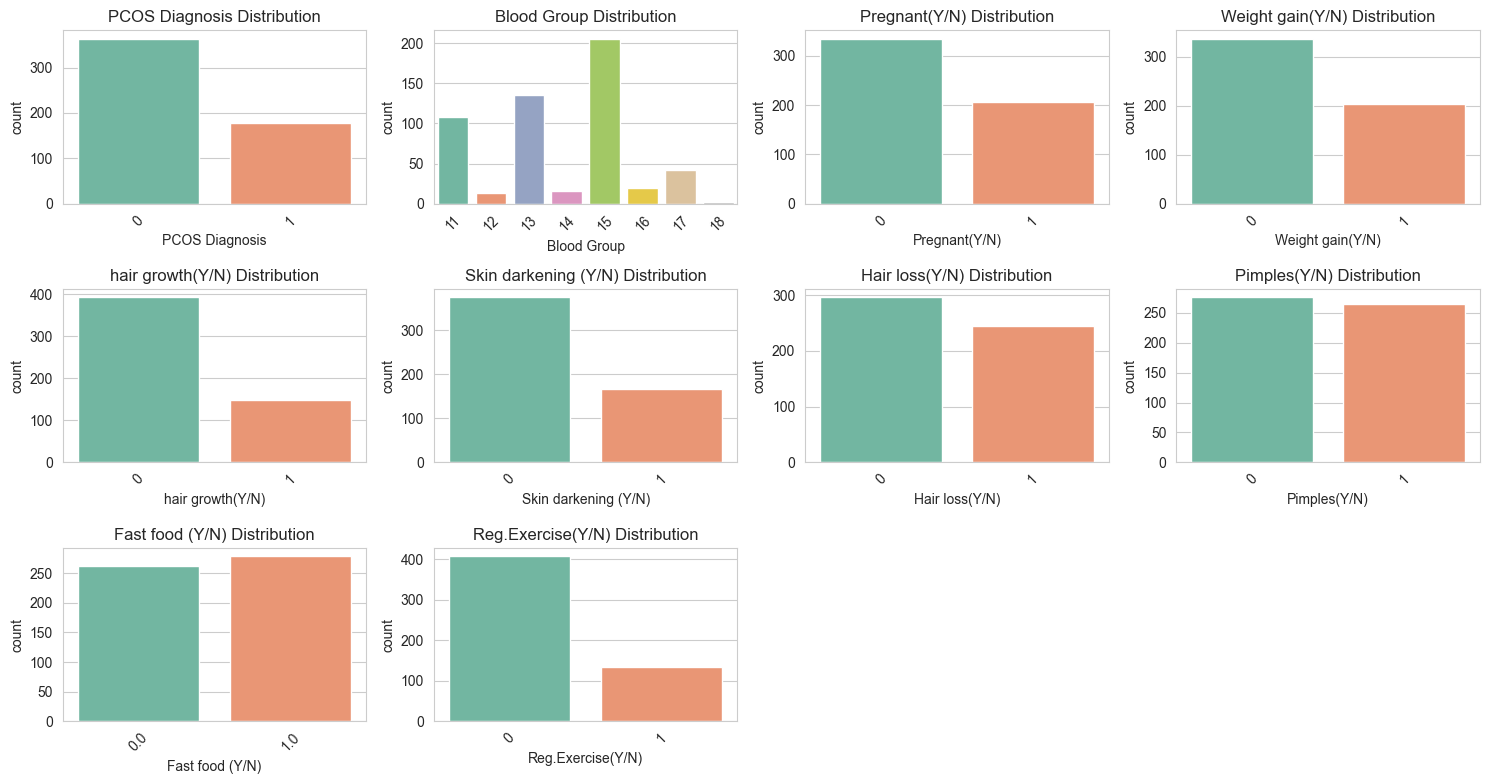

In [247]:
# Distribution of each categorical column
print("Categorical Column Distributions:")
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(dataset[col].value_counts())  

# Distribution of each categorical column using bar plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  
    sns.countplot(x=dataset[col], palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    
plt.tight_layout()
plt.show()

### **Bivariate Analysis: Correlation of Numeric Features**

Bivariate analysis helps to understand the relationships between two variables. 

In the case of numerical features, calculating the correlation matrix provides insights into how strongly pairs of numerical variables are related. 

Correlation values range from -1 to +1, where they indicate the following:

- -1 (perfect negative correlation)
- +1 (perfect positive correlation)
- 0 (no correlation)

The heatmap provides a visual representation of the correlation between numerical features.

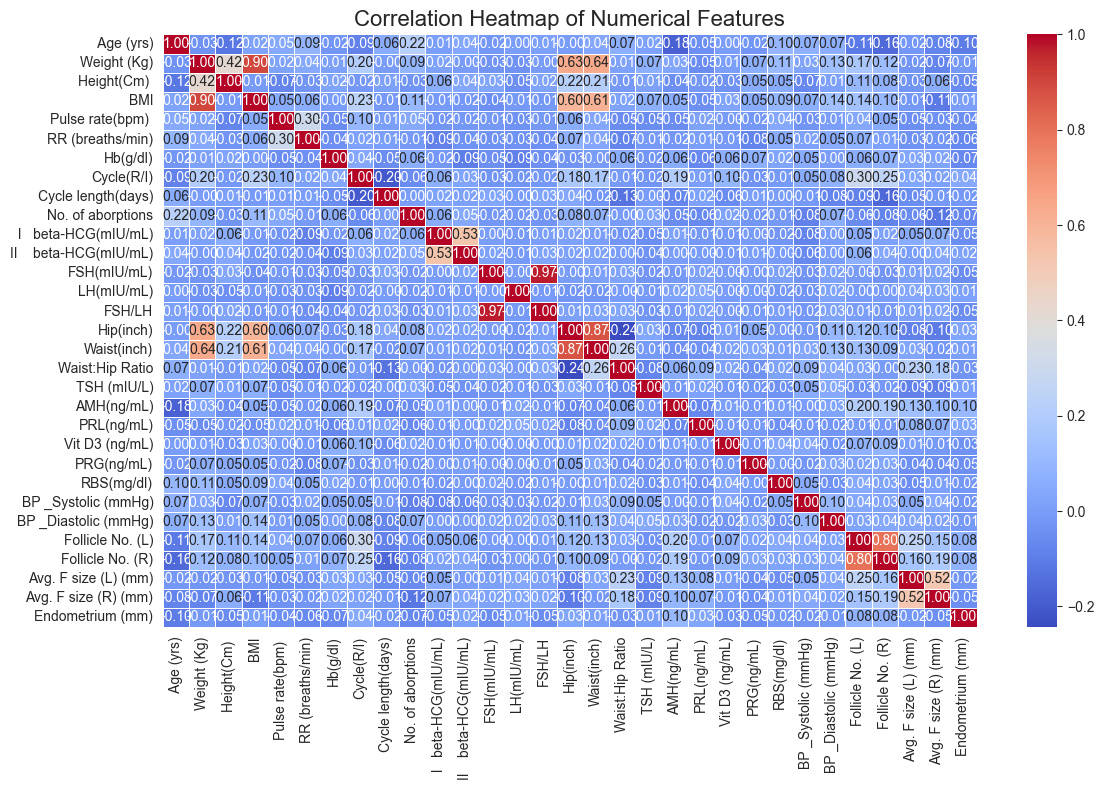

In [249]:
# Calculate the correlation matrix for numerical features
correlation_matrix = dataset[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels for better readability
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

### **Data Preprocessing**

Data preprocessing involves transforming raw data into a suitable format for modeling. This includes handling numerical variables through scaling and handling categorical variables through encoding.

### **Handling Numerical variables**

Scaling numerical features ensures that all features are on a similar scale, which is crucial for many machine learning algorithms. 

**Z-score normalization** is a popular method for scaling features.

This technique standardizes the data by subtracting the mean and dividing by the standard deviation, ensuring that the transformed data has a mean of 0 and a standard deviation of 1.

In [252]:
from sklearn.preprocessing import StandardScaler # For Z-Score Normalization

# Z-Score Normalization for numerical columns
numerical_data = dataset[numerical_columns]

# Initialize StandardScaler for z-score normalization
scaler = StandardScaler()

# Normalize the numerical columns
normalized_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_columns)

In [253]:
normalized_data.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),No. of aborptions,...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,-0.634606,-1.364770,-0.744005,-1.236546,1.073680,1.633608,-0.785169,-0.621534,0.039681,-0.416737,...,-0.094875,-0.010760,-0.422597,-0.631866,0.551645,-0.740617,-0.821471,0.836776,0.768537,0.011133
1,0.845230,0.486731,0.831983,0.150489,0.169968,0.448119,0.623440,-0.621534,0.039681,-0.416737,...,0.032913,0.094356,-0.422597,0.723565,-1.244023,-0.740617,-0.370287,-0.005083,-0.437816,-2.207618
2,0.290291,0.831618,1.412610,0.236785,-0.281888,-0.737370,0.738900,-0.621534,0.039681,-0.416737,...,-0.000624,-0.065946,-0.854047,0.723565,0.551645,1.626032,1.885630,0.836776,1.371714,0.704493
3,1.030210,0.486731,-1.407579,1.323495,-0.281888,0.448119,0.969819,-0.621534,0.039681,-0.416737,...,-0.047749,-0.065946,-1.285497,0.723565,-1.244023,-0.977282,-1.047063,-0.005083,-0.437816,-0.451107
4,-1.189545,-0.693147,0.749036,-1.048778,-0.281888,-0.737370,-1.339375,-0.621534,0.039681,-0.416737,...,-0.017682,-0.060690,-0.854047,0.723565,0.551645,-0.740617,-0.595879,0.275536,-0.437816,-0.682227


**Observation**

After standardizing the features, the numerical columns will have a mean of 0 and a standard deviation of 1.

### **Handling categorical variables**

One-Hot Encoding is used to convert categorical variables into a format that can be provided to machine learning algorithms. It creates a binary column for each category, representing the presence (1) or absence (0) of that category.

In [256]:
# from sklearn.preprocessing import OneHotEncoder # For encoding categorical variables

# # One-Hot Encoding for categorical columns
# categorical_data = dataset[categorical_columns]

# # Perform one-hot encoding for categorical columns
# encoded_data = pd.get_dummies(categorical_data, drop_first=True)  # drop_first=True to avoid multicollinearity

encoded_data = dataset[categorical_columns]

### **Merging Both Sets of Variables**

After handling the numerical and categorical variables (normalizing the numerical data and encoding the categorical data), these two sets of processed variables are merged into one final dataset that can be used for modeling.

In [258]:
# Combine the encoded categorical data and normalized numerical data
processed_data = pd.concat([normalized_data, encoded_data], axis=1)

processed_data.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),No. of aborptions,...,PCOS Diagnosis,Blood Group,Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,-0.634606,-1.364770,-0.744005,-1.236546,1.073680,1.633608,-0.785169,-0.621534,0.039681,-0.416737,...,0,15,0,0,0,0,0,0,1.0,0
1,0.845230,0.486731,0.831983,0.150489,0.169968,0.448119,0.623440,-0.621534,0.039681,-0.416737,...,0,15,1,0,0,0,0,0,0.0,0
2,0.290291,0.831618,1.412610,0.236785,-0.281888,-0.737370,0.738900,-0.621534,0.039681,-0.416737,...,1,11,1,0,0,0,1,1,1.0,0
3,1.030210,0.486731,-1.407579,1.323495,-0.281888,0.448119,0.969819,-0.621534,0.039681,-0.416737,...,0,13,0,0,0,0,0,0,0.0,0
4,-1.189545,-0.693147,0.749036,-1.048778,-0.281888,-0.737370,-1.339375,-0.621534,0.039681,-0.416737,...,0,11,1,0,0,0,1,0,0.0,0


### **Observing the Correlation with the Target Variable**

Understanding how each numerical feature correlates with the target variable ("PCOS Diagnosis") can help identify which features are most relevant for predicting the target. 

A strong correlation (either positive or negative) with the target suggests that the feature may be important for the model.

In [260]:
correlations_with_target = dataset[numerical_columns].corrwith(dataset['PCOS Diagnosis']) # Pairwise correlation of each numerical column with 'PCOS Diagnosis'

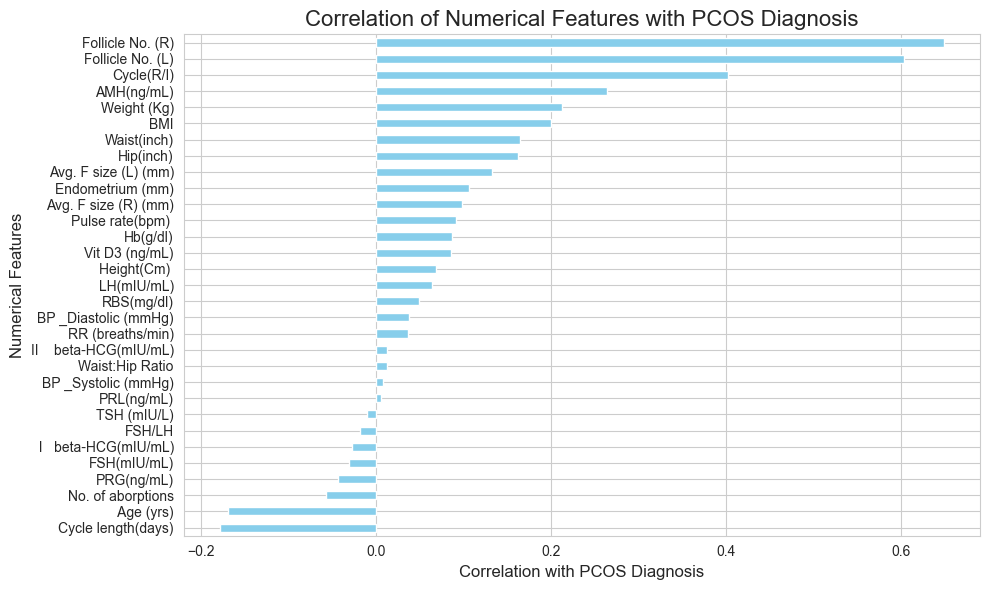

Cycle length(days)       -0.178480
 Age (yrs)               -0.168513
No. of aborptions        -0.057158
PRG(ng/mL)               -0.043834
FSH(mIU/mL)              -0.030319
  I   beta-HCG(mIU/mL)   -0.027617
FSH/LH                   -0.018336
TSH (mIU/L)              -0.010140
PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.012760
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
RBS(mg/dl)                0.048922
LH(mIU/mL)                0.063879
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)          0.106648
Avg. F size (L) (mm)      0.132992
Hip(inch)                 0.162297
Waist(inch)               0.164598
BMI                       0.199534
Weight (Kg)               0.211938
AMH(ng/mL)                0.264141
Cycle(R/I)          

In [261]:
# Plot the correlation values with the target variable
plt.figure(figsize=(10, 6))
correlations_with_target.sort_values().plot(kind='barh', color='skyblue')

plt.title('Correlation of Numerical Features with PCOS Diagnosis', fontsize=16)
plt.xlabel('Correlation with PCOS Diagnosis', fontsize=12)
plt.ylabel('Numerical Features', fontsize=12)
plt.tight_layout()

plt.show()

# Display the correlation values
print(correlations_with_target.sort_values())

**Observing the Absolute Values of Correlation with the Target Variable**

To get a better understanding of the strength of the relationship between each numerical feature and the target variable ("PCOS Diagnosis"), it's useful to examine the absolute values of the correlations. This removes the distinction between positive and negative correlations, focusing solely on the strength of the relationship.

In [263]:
# Absolute values of the correlations with the target variable
absolute_correlations = correlations_with_target.abs()

# Sort the absolute correlations in descending order
sorted_absolute_correlations = absolute_correlations.sort_values(ascending=False)

print(sorted_absolute_correlations)

Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Cycle(R/I)                0.401644
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
LH(mIU/mL)                0.063879
No. of aborptions         0.057158
RBS(mg/dl)                0.048922
PRG(ng/mL)                0.043834
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
FSH(mIU/mL)               0.030319
  I   beta-HCG(mIU/mL)    0.027617
FSH/LH                    0.018336
II    beta-HCG(mIU/mL)    0.012760
Waist:Hip Ratio           0.012386
TSH (mIU/L)         

### **Feature selection**

Feature selection is a crucial step in the machine learning pipeline. It involves identifying the most relevant features to use in building the model, improving performance, and reducing complexity. 

Two common methods for feature selection used are:
1. ANOVA (for numerical features)
2. Chi-Squared test (for categorical features)

### **ANOVA (Analysis of Variance) - For Numerical Features**

The ANOVA (Analysis of Variance) test is used to determine whether there is a significant difference between the means of numerical features across different classes of the target variable (PCOS Diagnosis). Features with a low p-value (typically p < 0.05) are considered statistically significant and are more likely to be useful for prediction.

In [266]:
from scipy.stats import f_oneway # For ANOVA

target_variable = 'PCOS Diagnosis'

# Empty dictionary to store ANOVA p-values
anova_results = {}

# Perform ANOVA for each numerical feature
for feature in numerical_columns:
    # Grouping data based on the target variable (0 = No PCOS, 1 = PCOS)
    group_0 = dataset[dataset[target_variable] == 0][feature]
    group_1 = dataset[dataset[target_variable] == 1][feature]
    
    anova_results[feature] = f_oneway(group_0, group_1).pvalue # Perform ANOVA and store the p-value

# Print all features with their p-values
print("ANOVA Test Results (Feature: p-value):")
for feature, p_value in anova_results.items():
    print(f"{feature}: {p_value}")

# Select significant features with p-value < 0.05
significant_numerical_features = [key for key, value in anova_results.items() if value < 0.05]

# Print significant features
print("\nSignificant Numerical Features from ANOVA Test (p-value < 0.05):")
significant_numerical_features

ANOVA Test Results (Feature: p-value):
 Age (yrs): 8.194488228196659e-05
Weight (Kg): 6.532451436301888e-07
Height(Cm) : 0.11280342391344683
BMI: 2.9048461323340535e-06
Pulse rate(bpm) : 0.03273950536683295
RR (breaths/min): 0.39132145062995316
Hb(g/dl): 0.04269392355040205
Cycle(R/I): 2.1754276134107855e-22
Cycle length(days): 2.9758227373105646e-05
No. of aborptions: 0.18434971456687888
  I   beta-HCG(mIU/mL): 0.5215337665887614
II    beta-HCG(mIU/mL): 0.7671354562814846
FSH(mIU/mL): 0.4815958757295894
LH(mIU/mL): 0.13784464591837375
FSH/LH: 0.6704466097237365
Hip(inch): 0.00014981967783723825
Waist(inch): 0.00012013418737270043
Waist:Hip Ratio: 0.7737862138464187
TSH (mIU/L): 0.813973680105784
AMH(ng/mL): 4.3555350730502957e-10
PRL(ng/mL): 0.9049990466252736
Vit D3 (ng/mL): 0.04685719491648393
PRG(ng/mL): 0.30882646217680854
RBS(mg/dl): 0.2559754905408742
BP _Systolic (mmHg): 0.8537790188545884
BP _Diastolic (mmHg): 0.37730762153658937
Follicle No. (L): 6.0365298260244666e-55
Follic

[' Age (yrs)',
 'Weight (Kg)',
 'BMI',
 'Pulse rate(bpm) ',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Hip(inch)',
 'Waist(inch)',
 'AMH(ng/mL)',
 'Vit D3 (ng/mL)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

### **Chi-Square Test for Feature Selection (Categorical Features)**

The Chi-Square Test is used to determine whether there is a significant association between categorical features and the target variable. Features with a low p-value (typically p < 0.05) are considered statistically significant and are likely to be important for prediction.

In [268]:
from scipy.stats import chi2_contingency # For Chi-Square Test

target_variable = 'PCOS Diagnosis'

chi_square_results = {}

# Perform Chi-Square Test
for col in categorical_columns:
    contingency_table = pd.crosstab(dataset[col], dataset[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Select significant features with p-value < 0.05
significant_categorical_features = [key for key, value in chi_square_results.items() if value < 0.05]

print("Significant Categorical Features from Chi-Square Test:")
significant_categorical_features

Significant Categorical Features from Chi-Square Test:


['PCOS Diagnosis',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)']

**Merge selected columns**

In [270]:
# Combine significant numerical and categorical features
significant_features = [
    ' Age (yrs)', 'Weight (Kg)', 'BMI', 'Pulse rate(bpm) ', 'Hb(g/dl)', 
    'Cycle(R/I)', 'Cycle length(days)', 'Hip(inch)', 
    'Waist(inch)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'Follicle No. (L)', 
    'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 
    'Endometrium (mm)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
    'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)'
]

# Filter dataset to include only selected features
significant_data = dataset[significant_features]

### **Creating graphs for the frontend dashboards**

### **1. General PCOS-Related Insights Dashboard**

In [315]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the output directory exists
output_folder = "pcos_visuals"
os.makedirs(output_folder, exist_ok=True)

# Define custom color palette and style
custom_palette = ['#6a0dad', '#F1C6D9']
sns.set_palette(custom_palette)
sns.set_style("whitegrid")  # Subtle grid background

# Define the categorical columns for symptoms
categorical_columns = [
    'PCOS Diagnosis', 'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

# Filter for PCOS-positive patients
pcos_patients = processed_data[processed_data["PCOS Diagnosis"] == 1]

# Compute the percentage of PCOS-positive patients showing each symptom
symptom_percentages = (pcos_patients[categorical_columns].mean()) * 100

# Drop 'PCOS Diagnosis' and other non-symptom columns
symptom_percentages = symptom_percentages.drop(
    ["PCOS Diagnosis", "Blood Group", 'Pregnant(Y/N)', 'Reg.Exercise(Y/N)', 'Fast food (Y/N)']
)

# Clean and format symptom names
symptom_percentages.index = symptom_percentages.index.str.replace('(Y/N)', '', regex=False).str.replace('hair', 'Hair', regex=False)

# Create the plot
plt.figure(figsize=(5,3))
bars = symptom_percentages.sort_values().plot(kind='barh', color=custom_palette[1], edgecolor='black')

# Add labels to bars
for bar in bars.patches:
    plt.text(bar.get_width() + 1,  
             bar.get_y() + bar.get_height() / 2,  
             f"{bar.get_width():.1f}%",  
             va='center', fontsize=12, color='black')

# Customize title and labels
plt.title("Percentage of PCOS Patients with Each Symptom", fontsize=20, color=custom_palette[0])
plt.xlabel("Percentage (%)", fontsize=15)
plt.ylabel("Symptoms", fontsize=15)
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enable a subtle grid only on the x-axis
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Lighter grid for better visibility
sns.despine(left=True)  # Remove left spine for a cleaner look

# Save the plot
plt.savefig(os.path.join(output_folder, "pcos_symptoms_percentage.png"), bbox_inches="tight")
plt.close()

In [356]:
# # (B) Fast food effect

import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Ensure the output directory exists
output_folder = "pcos_visuals"
os.makedirs(output_folder, exist_ok=True)

# Define pastel color scheme
pcos_colors = ["#E8A2C6", "#C4C3D0"]  # Light pink & pastel purple

# Group data by Fast Food Consumption
fast_food_groups = processed_data.groupby("Fast food (Y/N)")

# Compute percentage of PCOS cases within each group
pcos_rate = fast_food_groups["PCOS Diagnosis"].mean() * 100

# Compute symptom percentages for fast food vs. non-fast food groups
symptoms = ["Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)"]
symptom_percentages = fast_food_groups[symptoms].mean() * 100

# Clean symptom names in the columns
symptom_percentages.columns = symptom_percentages.columns.str.replace('(Y/N)', '', regex=False).str.replace('hair', 'Hair', regex=False)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

## (1) PCOS Diagnosis Rate by Fast Food Consumption
bars = sns.barplot(x=pcos_rate.index, y=pcos_rate.values, ax=ax[0], palette=pcos_colors, edgecolor="black")

# Add percentage labels
for bar in bars.patches:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
               f"{bar.get_height():.1f}%", ha='center', fontsize=12, color="black")

# Set titles & labels
ax[0].set_title("PCOS Diagnosis Rate vs. Fast Food Consumption", fontsize=14, color="#6a0dad")
ax[0].set_xlabel("Fast Food Consumption (0 = No, 1 = Yes)", fontsize=12)
ax[0].set_ylabel("Percentage of PCOS Cases (%)", fontsize=12)
ax[0].set_ylim(0, 60)

# Add subtle grid on y-axis
ax[0].grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=False, right=False, top=False)  # Hide top and right spines to focus on the box

# Add custom legend with correct colors
legend_labels = ['Non-Fast Food Consumers', 'Fast Food Consumers']
legend_handles = [Patch(color=pcos_colors[0]), Patch(color=pcos_colors[1])]
ax[0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', fontsize=10)

# Add box around the graph
for spine in ax[0].spines.values():
    spine.set_visible(True)  # Show the edges of the graph

## (2) Symptom Prevalence Among Fast Food Consumers vs. Non-Consumers
symptom_percentages.T.plot(kind="bar", ax=ax[1], color=pcos_colors, edgecolor="black")

# Add labels to each bar
for bar_group in ax[1].containers:
    ax[1].bar_label(bar_group, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

# Set titles & labels
ax[1].set_title("Symptom Prevalence: Fast Food Consumers vs. Non-Consumers", fontsize=14, color="#6a0dad")
ax[1].set_xlabel("Symptoms", fontsize=12)
ax[1].set_ylabel("Percentage (%)", fontsize=12)

# Add subtle grid on y-axis
ax[1].grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=False, right=False, top=False)  # Hide top and right spines

# Adjust legend position
ax[1].legend(["Non-Fast Food Consumers", "Fast Food Consumers"], loc="upper right", fontsize=10)

# Add box around the graph
for spine in ax[1].spines.values():
    spine.set_visible(True)  # Show the edges of the graph

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "fast_food_vs_pcos_symptoms.png"), dpi=300, bbox_inches="tight")
plt.close()

/var/folders/7j/gg3mw2_55k302y_f8p9rzrqm0000gn/T/ipykernel_69640/2548558934.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=pcos_rate.index, y=pcos_rate.values, ax=ax[0], palette=pcos_colors, edgecolor="black")
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


In [357]:
## c) Regular Exercise Effect

# Define pastel color scheme for exercise analysis
exercise_colors = ["#E8A2C6", "#C4C3D0"]  # Light pink & pastel purple

exercise_groups = processed_data.groupby("Reg.Exercise(Y/N)")

# Compute percentage of PCOS cases within each group
exercise_pcos_rate = exercise_groups["PCOS Diagnosis"].mean() * 100

# Compute symptom percentages for regular exercise vs. non-exercise groups
exercise_symptom_percentages = exercise_groups[symptoms].mean() * 100

# Clean symptom names in the columns
exercise_symptom_percentages.columns = symptom_percentages.columns.str.replace('(Y/N)', '', regex=False).str.replace('hair', 'Hair', regex=False)

# Create subplots for exercise impact on PCOS and symptoms
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

## (1) PCOS Diagnosis Rate by Regular Exercise
exercise_bars = sns.barplot(x=exercise_pcos_rate.index, y=exercise_pcos_rate.values, ax=ax[0], palette=exercise_colors, edgecolor="black")

# Add percentage labels
for bar in exercise_bars.patches:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
               f"{bar.get_height():.1f}%", ha='center', fontsize=12, color="black")

# Set titles & labels
ax[0].set_title("PCOS Diagnosis Rate vs. Regular Exercise", fontsize=14, color="#6a0dad")
ax[0].set_xlabel("Regular Exercise (0 = No, 1 = Yes)", fontsize=12)
ax[0].set_ylabel("Percentage of PCOS Cases (%)", fontsize=12)
ax[0].set_ylim(0, 60)

# Add subtle grid on y-axis
ax[0].grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=False, right=False, top=False)  # Hide top and right spines to focus on the box

# Add custom legend with correct colors
exercise_legend_labels = ['Non-Exercisers', 'Exercisers']
exercise_legend_handles = [Patch(color=exercise_colors[0]), Patch(color=exercise_colors[1])]
ax[0].legend(handles=exercise_legend_handles, labels=exercise_legend_labels, loc='upper left', fontsize=10)

# Add box around the graph
for spine in ax[0].spines.values():
    spine.set_visible(True)  # Show the edges of the graph

## (2) Symptom Prevalence Among Regular Exercise vs. Non-Exercise
exercise_symptom_percentages.T.plot(kind="bar", ax=ax[1], color=exercise_colors, edgecolor="black")

# Add labels to each bar
for bar_group in ax[1].containers:
    ax[1].bar_label(bar_group, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

# Set titles & labels
ax[1].set_title("Symptom Prevalence: Regular Exercise vs. Non-Exercise", fontsize=14, color="#6a0dad")
ax[1].set_xlabel("Symptoms", fontsize=12)
ax[1].set_ylabel("Percentage (%)", fontsize=12)

# Add subtle grid on y-axis
ax[1].grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=False, right=False, top=False)  # Hide top and right spines

# Adjust legend position
ax[1].legend(["Non-Exercisers", "Exercisers"], loc="upper right", fontsize=10)

# Add box around the graph
for spine in ax[1].spines.values():
    spine.set_visible(True)  # Show the edges of the graph

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "exercise_vs_pcos_symptoms.png"), dpi=300, bbox_inches="tight")
plt.close()

/var/folders/7j/gg3mw2_55k302y_f8p9rzrqm0000gn/T/ipykernel_69640/367808604.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  exercise_bars = sns.barplot(x=exercise_pcos_rate.index, y=exercise_pcos_rate.values, ax=ax[0], palette=exercise_colors, edgecolor="black")
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

In [361]:
## d) PCOS vs Non PCOS count

# Count the number of PCOS and non-PCOS individuals
pcos_count = processed_data["PCOS Diagnosis"].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot a donut chart
wedges, texts, autotexts = ax.pie(pcos_count, labels=pcos_count.index, autopct='%1.1f%%', startangle=90, 
                                  colors=["#E8A2C6", "#C4C3D0"], wedgeprops=dict(width=0.4))

# Add title
ax.set_title("Distribution of PCOS vs. Non-PCOS", fontsize=14)

# Add a legend
ax.legend(wedges, ["PCOS", "Non-PCOS"], loc="upper left", fontsize=10)

# Display the donut chart
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "pcos_distribution_donut_chart.png"), bbox_inches="tight")
plt.close()

In [326]:
## e) 70% of PCOS patients remain undiagnosed - to show the gravity of the problem

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os  

# Create the plot with a larger figure size
fig, ax = plt.subplots(figsize=(10, 5))  

# Define total users and diagnosis stats
total_users = 10
diagnosed_pcos = 3
undiagnosed_pcos = total_users - diagnosed_pcos

# Circle properties
circle_radius = 0.3 
spacing = 2  
x_start = 0
y_start = 0

# Colors
diagnosed_color = '#C4C3D0'
undiagnosed_color = '#F1C6D9'

# Draw diagnosed and undiagnosed PCOS circles
for i in range(total_users):
    color = diagnosed_color if i < diagnosed_pcos else undiagnosed_color
    circle = patches.Circle((x_start + i * spacing, y_start), 
                            radius=circle_radius, 
                            facecolor=color, 
                            edgecolor='black', linewidth=1.5)
    ax.add_patch(circle)

# circle shape
ax.set_aspect('equal')

# Title
ax.set_title('Hidden Risk \n70% of PCOS Cases Are Undiagnosed (Out of 10 Users)', 
             fontsize=16, fontweight='bold', pad=20)

# Add a legend (color key)
legend_patches = [
    patches.Patch(color=diagnosed_color, label="Diagnosed"),
    patches.Patch(color=undiagnosed_color, label="Undiagnosed")
]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12, frameon=False)

# Adjust axes
ax.set_xlim(-1, total_users * spacing)
ax.set_ylim(-1, 2)
ax.axis('off')  # Hide axes 

# Save and show plot
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "undiagnosed_pcos_distribution.png"), bbox_inches="tight")

plt.close()

### **Feature Divisions Based on User Accessibility**

The dataset can be divided into different categories of features based on the types of users and their levels of accessibility to the features. These divisions are:

1. **General Public Features**\
These are the features that can be accessed by the general public, which include basic health and lifestyle information.

2. **Blood Test Features**\
These features include all the relevant health and blood test data that might be required for medical diagnosis or consultation. This group includes the basic features from the general public plus the additional blood test or other hormonal parameters.

3. **Scan Features**\
These features are typically collected through medical scans, providing more detailed and specific health information, including measurements from ultrasound and other scan-based diagnostics. This group includes the blood test features and additional scan-based parameters.

In [99]:
features_general_public = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 
    'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)',  
    'Pregnant(Y/N)', 'No. of aborptions', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',  
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
    'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 
    'BP _Diastolic (mmHg)'
]

features_blood_test = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 
    'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)',  
    'Pregnant(Y/N)', 'No. of aborptions', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
    'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 
    'BP _Diastolic (mmHg)', 'Hb(g/dl)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',  
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 
    'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)'
]

features_scan = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

In [100]:
processed_data[features_general_public].shape

(541, 23)

In [101]:
processed_data[features_blood_test].shape

(541, 35)

In [102]:
processed_data[features_scan].shape

(541, 40)

In [103]:
# selected_data.shape

**Number of features**

1. features_general_public - 24
2. features_blood_test - 36
3. features_scan - 41

### **Train-Test Split**

It involves dividing the dataset into two subsets: one for training the model and one for testing its performance. This ensures that the model is evaluated on unseen data, providing a more realistic measure of its performance.

### **Sensitivity Analysis**

Evaluating Model Performance with Different Train-Test Splits helps to assess the robustness and stability of the model's predictions. By using different splits, we can understand how the amount of training data affects the model's ability to generalize to unseen data.

In this case, we evaluate the model's performance using three different train-test splits:
1. **80:20** - 80% training data, 20% testing data.
2. **85:15** - 85% training data, 15% testing data.
3. **90:10** - 90% training data, 10% testing data.

By comparing the results across these splits, we can determine if the model's performance improves with more training data or if a smaller test set leads to better generalization.

### **Models Chosen for Classification**

The following machine learning models were chosen to train and evaluate the dataset. These models represent a variety of algorithms, from linear models to more complex ensemble and neural network-based models. This diversity allows for a comprehensive analysis of model performance across different approaches.

1. **Logistic Regression**: A linear model for binary classification.
2. **Support Vector Machine (SVM)**: A powerful classifier that works well for high-dimensional data.
3. **K-Nearest Neighbors (KNN)**: A non-parametric method that classifies based on the majority vote of neighbors.
4. **Gradient Boosting**: An ensemble method that builds trees sequentially to correct errors made by previous ones.
5. **Random Forest**: An ensemble of decision trees that improves accuracy by reducing overfitting.
6. **MLP Neural Network**: A multi-layer perceptron classifier that learns non-linear patterns in the data.
7. **Decision Trees**: A model that splits data into branches to make predictions based on feature values.

These models will be trained and evaluated on the dataset using different train-test splits to assess their performance and suitability for predicting PCOS diagnosis.

### **80:20 Split**

In [109]:
# # keep
# # Import necessary libraries
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix, 
#     precision_score, recall_score, f1_score
# )
# import numpy as np

# # Define hyperparameter grids
# param_grids = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [5, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "max_features": ["sqrt", "log2", None],
#     },
#     "Logistic Regression": {
#         "penalty": ["l1", "l2", "elasticnet"],
#         "C": [0.01, 0.1, 1],
#         "solver": ["saga", "liblinear", "lbfgs"],
#         "max_iter": [100, 500, 1000],
#     },
#     "SVM": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "poly", "rbf"],
#         "gamma": ["scale", "auto"],
#     },
#     "KNN": {
#         "n_neighbors": [3, 5, 10],
#         "weights": ["uniform", "distance"],
#         "metric": ["euclidean", "manhattan"],
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.5],
#         "max_depth": [3, 5, 7],
#     },
#     "MLP Neural Network": {
#         "hidden_layer_sizes": [(5,), (10,)],
#         "activation": ["tanh", "logistic"],
#         "solver": ["adam", "sgd"],
#     },
#     "Decision Trees": {
#         "max_depth": [5, 10, 20],
#         "criterion": ["gini", "entropy"],
#         "min_samples_split": [2, 5, 10],
#     },
# }

# # Models to tune
# models_to_tune = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "MLP Neural Network": MLPClassifier(max_iter=1000),
#     "Decision Trees": DecisionTreeClassifier(random_state=42)
# }

# # Function to compute additional metrics
# def compute_metrics(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, zero_division=0)
#     recall = recall_score(y_test, y_pred)  # Sensitivity
#     specificity = tn / (tn + fp)
#     f1 = f1_score(y_test, y_pred)

#     print("\nConfusion Matrix:")
#     print(cm)
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall (Sensitivity): {recall:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"True Positives (TP): {tp}")
#     print(f"True Negatives (TN): {tn}")
#     print(f"False Positives (FP): {fp}")
#     print(f"False Negatives (FN): {fn}")

# # Function for hyperparameter tuning and model evaluation
# def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
#     best_models_gen = {}
#     for name, model in models.items():
#         print(f"\nTuning hyperparameters for {name}...")
#         grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
#         grid_search.fit(X_train, y_train)
        
#         print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
#         best_model = grid_search.best_estimator_
#         best_models_gen[name] = best_model
        
#         y_pred = best_model.predict(X_test)
        
#         print(f"\nEvaluating {name} with best hyperparameters...")
#         compute_metrics(y_test, y_pred)
        
#         print(f"\nClassification Report for {name}:")
#         print(classification_report(y_test, y_pred))
        
#     return best_models_gen

# # Load dataset (assuming 'processed_data' is already prepared)
# X = processed_data[features_general_public]
# y = processed_data['PCOS Diagnosis']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Call the function with resampled data
# best_models_gen = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)

### **85:15 Split**

In [111]:
# KEEP
# # Import necessary libraries
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix, 
#     precision_score, recall_score, f1_score
# )
# import numpy as np

# # Define hyperparameter grids
# param_grids = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [5, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "max_features": ["sqrt", "log2", None],
#     },
#     "Logistic Regression": {
#         "penalty": ["l1", "l2", "elasticnet"],
#         "C": [0.01, 0.1, 1],
#         "solver": ["saga", "liblinear", "lbfgs"],
#         "max_iter": [100, 500, 1000],
#     },
#     "SVM": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "poly", "rbf"],
#         "gamma": ["scale", "auto"],
#     },
#     "KNN": {
#         "n_neighbors": [3, 5, 10],
#         "weights": ["uniform", "distance"],
#         "metric": ["euclidean", "manhattan"],
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.5],
#         "max_depth": [3, 5, 7],
#     },
#     "MLP Neural Network": {
#         "hidden_layer_sizes": [(5,), (10,)],
#         "activation": ["tanh", "logistic"],
#         "solver": ["adam", "sgd"],
#     },
#     "Decision Trees": {
#         "max_depth": [5, 10, 20],
#         "criterion": ["gini", "entropy"],
#         "min_samples_split": [2, 5, 10],
#     },
# }

# # Models to tune
# models_to_tune = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "MLP Neural Network": MLPClassifier(max_iter=1000),
#     "Decision Trees": DecisionTreeClassifier(random_state=42)
# }

# # Function to compute additional metrics
# def compute_metrics(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, zero_division=0)
#     recall = recall_score(y_test, y_pred)  # Sensitivity
#     specificity = tn / (tn + fp)
#     f1 = f1_score(y_test, y_pred)

#     print("\nConfusion Matrix:")
#     print(cm)
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall (Sensitivity): {recall:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"True Positives (TP): {tp}")
#     print(f"True Negatives (TN): {tn}")
#     print(f"False Positives (FP): {fp}")
#     print(f"False Negatives (FN): {fn}")

# # Function for hyperparameter tuning and model evaluation
# def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
#     best_models_gen = {}
#     for name, model in models.items():
#         print(f"\nTuning hyperparameters for {name}...")
#         grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
#         grid_search.fit(X_train, y_train)
        
#         print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
#         best_model = grid_search.best_estimator_
#         best_models_gen[name] = best_model
        
#         y_pred = best_model.predict(X_test)
        
#         print(f"\nEvaluating {name} with best hyperparameters...")
#         compute_metrics(y_test, y_pred)
        
#         print(f"\nClassification Report for {name}:")
#         print(classification_report(y_test, y_pred))
        
#     return best_models_gen

# # Load dataset (assuming 'processed_data' is already prepared)
# X = processed_data[features_general_public]
# y = processed_data['PCOS Diagnosis']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# # Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Call the function with resampled data
# best_models_gen = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)

### **90:10 Split**

In [113]:
#### Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, recall_score, f1_score
)
import numpy as np

# Define hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "max_features": ["sqrt", "log2", None],
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1],
        "solver": ["saga", "liblinear", "lbfgs"],
        "max_iter": [100, 500, 1000],
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf"],
        "gamma": ["scale", "auto"],
    },
    "KNN": {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"],
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [3, 5, 7],
    },
    "MLP Neural Network": {
        "hidden_layer_sizes": [(5,), (10,)],
        "activation": ["tanh", "logistic"],
        "solver": ["adam", "sgd"],
    },
    "Decision Trees": {
        "max_depth": [5, 10, 20],
        "criterion": ["gini", "entropy"],
        "min_samples_split": [2, 5, 10],
    },
}

# Models to tune
models_to_tune = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Neural Network": MLPClassifier(max_iter=1000),
    "Decision Trees": DecisionTreeClassifier(random_state=42)
}

# Function to compute additional metrics
def compute_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    print("\nConfusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

# Function for hyperparameter tuning and model evaluation
def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
    best_models_gen = {}
    for name, model in models.items():
        print(f"\nTuning hyperparameters for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
        best_model = grid_search.best_estimator_
        best_models_gen[name] = best_model
        
        y_pred = best_model.predict(X_test)
        
        print(f"\nEvaluating {name} with best hyperparameters...")
        compute_metrics(y_test, y_pred)
        
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred))
        
    return best_models_gen

# Load dataset (assuming 'processed_data' is already prepared)
X = processed_data[features_general_public]
y = processed_data['PCOS Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Call the function with resampled data
best_models_gen = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)


Tuning hyperparameters for Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Evaluating Logistic Regression with best hyperparameters...

Confusion Matrix:
[[30  7]
 [ 3 15]]
Accuracy: 0.8182
Precision: 0.6818
Recall (Sensitivity): 0.8333
Specificity: 0.8108
F1 Score: 0.7500
True Positives (TP): 15
True Negatives (TN): 30
False Positives (FP): 7
False Negatives (FN): 3

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.68      0.83      0.75        18

    accuracy                           0.82        55
   macro avg       0.80      0.82      0.80        55
weighted avg       0.83      0.82      0.82        55


Tuning hyperparameters for SVM...
Best hyperparameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Evaluating SVM with best hyperparameters...

Confusion Matrix:
[[29  8]
 [ 9  9]]
Accuracy: 0.6909
Precision:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_netwo

Best hyperparameters for MLP Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'solver': 'adam'}

Evaluating MLP Neural Network with best hyperparameters...

Confusion Matrix:
[[28  9]
 [ 5 13]]
Accuracy: 0.7455
Precision: 0.5909
Recall (Sensitivity): 0.7222
Specificity: 0.7568
F1 Score: 0.6500
True Positives (TP): 13
True Negatives (TN): 28
False Positives (FP): 9
False Negatives (FN): 5

Classification Report for MLP Neural Network:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.59      0.72      0.65        18

    accuracy                           0.75        55
   macro avg       0.72      0.74      0.73        55
weighted avg       0.76      0.75      0.75        55


Tuning hyperparameters for Decision Trees...
Best hyperparameters for Decision Trees: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

Evaluating Decision Trees with best hyperparameters...

Confusion

### **Observations**

LINK AND DIAGRAM - TO ADD

### **Hyperparameter Tuning**

Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. 

These are the hyperparameters being tuned for each model.

### **Random Forest**:
1. **n_estimators**: Number of trees in the forest. More trees usually lead to better performance, but also increase computation time.
   
2. **max_depth**: The maximum depth of each tree. Limiting the depth helps prevent overfitting by making the model simpler.

3. **min_samples_split**: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns.
   
4. **max_features**: The number of features to consider when looking for the best split. Using fewer features can speed up the model but may reduce performance.


### **Logistic Regression**:
1. **penalty**: The type of regularization to apply to the model to prevent overfitting.

2. **C**: The inverse of regularization strength. Smaller values indicate stronger regularization (more penalty for large coefficients).

3. **solver**: The optimization algorithm used to find the best coefficients for the model.

4. **max_iter**: The maximum number of iterations for the solver to converge. Higher values are useful for complex datasets or when the solver is struggling to converge.


### **SVM**:
1. **C**: The regularization parameter controlling the model's complexity and ability to fit data.
   
2. **kernel**: The kernel function type, defining the decision boundary (linear, polynomial, RBF, or sigmoid).
   
3. **gamma**: Controls the influence of individual training examples, with options "scale" and "auto".

### **Cross validation**

Cross-validation is a technique used to evaluate a model’s performance by splitting the data into multiple subsets (folds) and training/testing the model on different combinations of these folds. Here 10-fold cross-validation is used with 'GridSearchCV' to tune hyperparameters, ensuring that the model’s performance is robust and generalized across different data subsets. This helps to prevent overfitting and provides a more reliable estimate of the model's accuracy.

### **Manual evaluation - General Public features - Simple risk assessment**

In [147]:
import pickle
import numpy as np
import pandas as pd

# Ensure the best Logistic Regression model exists
if "Logistic Regression" in best_models_gen:
    best_logistic_reg = best_models_gen["Logistic Regression"]
else:
    raise ValueError("Error: No trained Logistic Regression model found in best_models_gen!")

# Save the best Logistic Regression model to a pickle file
with open("best_logistic_reg_simple_smote.pkl", "wb") as model_file:
    pickle.dump(best_logistic_reg, model_file)

print("Best Logistic Regression model saved successfully!")

Best Logistic Regression model saved successfully!


In [178]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the saved model
with open("best_logistic_reg_simple_smote.pkl", "rb") as model_file:
    loaded_svm = pickle.load(model_file)

print("\nManual PCOS Diagnosis Prediction")

numerical_columns_gen = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 
    'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)', 
    'No. of aborptions', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'
]

categorical_columns_gen = [
    'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]


# Get user input for numerical columns
user_inputs = []

for col in numerical_columns_gen:
    while True:
        try:
            user_input = int(input(f"Enter value for {col}: "))
            user_inputs.append(user_input)
            break
        except ValueError:
            print("Please enter a valid integer.")

# Prepare the DataFrame with numerical inputs (before scaling)
numerical_inputs_df = pd.DataFrame([user_inputs], columns=numerical_columns_gen)

# Scale only numerical features using StandardScaler
scaler = StandardScaler()
scaled_numerical_inputs = scaler.fit_transform(numerical_inputs_df)

# Get user input for categorical columns and append them
categorical_inputs = []

for col in categorical_columns_gen:
    while True:
        try:
            user_input = int(input(f"Enter value for {col} (use integers for 'Y' as 1 and 'N' as 0): "))
            categorical_inputs.append(user_input)
            break
        except ValueError:
            print("Please enter a valid integer (1 for 'Y' and 0 for 'N').")

# Combine scaled numerical inputs and categorical inputs into a final DataFrame
final_inputs = pd.DataFrame(scaled_numerical_inputs, columns=numerical_columns_gen)
final_inputs[categorical_columns_gen] = categorical_inputs

# Ensure the column order matches the model's expectation
final_inputs = final_inputs[features_general_public]

# Make prediction using the trained SVM model
prediction = best_logistic_reg.predict(final_inputs)

if prediction[0] == 1:
    print("Prediction: Positive for PCOS")
else:
    print("Prediction: Negative for PCOS")


Manual PCOS Diagnosis Prediction


Enter value for  Age (yrs):  


Please enter a valid integer.


Enter value for  Age (yrs):  17
Enter value for Weight (Kg):  23
Enter value for Height(Cm) :  21
Enter value for BMI:  1
Enter value for Pulse rate(bpm) :  1
Enter value for RR (breaths/min):  1
Enter value for Cycle(R/I):  1
Enter value for Cycle length(days):  1
Enter value for No. of aborptions:  1
Enter value for Hip(inch):  1
Enter value for Waist(inch):  1
Enter value for Waist:Hip Ratio:  1
Enter value for BP _Systolic (mmHg):  11
Enter value for BP _Diastolic (mmHg):  1
Enter value for Blood Group (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for Pregnant(Y/N) (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for Weight gain(Y/N) (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for hair growth(Y/N) (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for Skin darkening (Y/N) (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for Hair loss(Y/N) (use integers for 'Y' as 1 and 'N' as 0):  1
Enter value for Pimples(Y/N) (use integers for 'Y' as 

Prediction: Positive for PCOS


In [182]:
# TRAINING ENHANCED MODELS WITH SMOTE

# KEEP
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, recall_score, f1_score
)
import numpy as np

# Define hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "max_features": ["sqrt", "log2", None],
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1],
        "solver": ["saga", "liblinear", "lbfgs"],
        "max_iter": [100, 500, 1000],
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf"],
        "gamma": ["scale", "auto"],
    },
    "KNN": {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"],
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [3, 5, 7],
    },
    "MLP Neural Network": {
        "hidden_layer_sizes": [(5,), (10,)],
        "activation": ["tanh", "logistic"],
        "solver": ["adam", "sgd"],
    },
    "Decision Trees": {
        "max_depth": [5, 10, 20],
        "criterion": ["gini", "entropy"],
        "min_samples_split": [2, 5, 10],
    },
}

# Models to tune
models_to_tune = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Neural Network": MLPClassifier(max_iter=1000),
    "Decision Trees": DecisionTreeClassifier(random_state=42)
}

# Function to compute additional metrics
def compute_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    print("\nConfusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

# Function for hyperparameter tuning and model evaluation
def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
    best_models_scan = {}
    for name, model in models.items():
        print(f"\nTuning hyperparameters for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
        best_model = grid_search.best_estimator_
        best_models_scan[name] = best_model
        
        y_pred = best_model.predict(X_test)
        
        print(f"\nEvaluating {name} with best hyperparameters...")
        compute_metrics(y_test, y_pred)
        
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred))
        
    return best_models_scan

# Load dataset (assuming 'processed_data' is already prepared)
X = processed_data[features_scan]
y = processed_data['PCOS Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Call the function with resampled data
best_models_scan = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)


Tuning hyperparameters for Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

Evaluating Logistic Regression with best hyperparameters...

Confusion Matrix:
[[67  6]
 [ 4 32]]
Accuracy: 0.9083
Precision: 0.8421
Recall (Sensitivity): 0.8889
Specificity: 0.9178
F1 Score: 0.8649
True Positives (TP): 32
True Negatives (TN): 67
False Positives (FP): 6
False Negatives (FN): 4

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.84      0.89      0.86        36

    accuracy                           0.91       109
   macro avg       0.89      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109


Tuning hyperparameters for SVM...
Best hyperparameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Evaluating SVM with best hyperparameters...

Confusion Matrix:
[[64  9]
 [10 26]]
Accuracy: 0.8257
Precision: 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_netwo

Best hyperparameters for MLP Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (5,), 'solver': 'sgd'}

Evaluating MLP Neural Network with best hyperparameters...

Confusion Matrix:
[[65  8]
 [ 6 30]]
Accuracy: 0.8716
Precision: 0.7895
Recall (Sensitivity): 0.8333
Specificity: 0.8904
F1 Score: 0.8108
True Positives (TP): 30
True Negatives (TN): 65
False Positives (FP): 8
False Negatives (FN): 6

Classification Report for MLP Neural Network:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.79      0.83      0.81        36

    accuracy                           0.87       109
   macro avg       0.85      0.86      0.86       109
weighted avg       0.87      0.87      0.87       109


Tuning hyperparameters for Decision Trees...
Best hyperparameters for Decision Trees: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

Evaluating Decision Trees with best hyperparameters...

Confusion Ma

In [183]:
# # KEEP

# # Import necessary libraries
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix, 
#     precision_score, recall_score, f1_score
# )
# import numpy as np

# # Define hyperparameter grids
# param_grids = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [5, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "max_features": ["sqrt", "log2", None],
#     },
#     "Logistic Regression": {
#         "penalty": ["l1", "l2", "elasticnet"],
#         "C": [0.01, 0.1, 1],
#         "solver": ["saga", "liblinear", "lbfgs"],
#         "max_iter": [100, 500, 1000],
#     },
#     "SVM": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "poly", "rbf"],
#         "gamma": ["scale", "auto"],
#     },
#     "KNN": {
#         "n_neighbors": [3, 5, 10],
#         "weights": ["uniform", "distance"],
#         "metric": ["euclidean", "manhattan"],
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.5],
#         "max_depth": [3, 5, 7],
#     },
#     "MLP Neural Network": {
#         "hidden_layer_sizes": [(5,), (10,)],
#         "activation": ["tanh", "logistic"],
#         "solver": ["adam", "sgd"],
#     },
#     "Decision Trees": {
#         "max_depth": [5, 10, 20],
#         "criterion": ["gini", "entropy"],
#         "min_samples_split": [2, 5, 10],
#     },
# }

# # Models to tune
# models_to_tune = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "MLP Neural Network": MLPClassifier(max_iter=1000),
#     "Decision Trees": DecisionTreeClassifier(random_state=42)
# }

# # Function to compute additional metrics
# def compute_metrics(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, zero_division=0)
#     recall = recall_score(y_test, y_pred)  # Sensitivity
#     specificity = tn / (tn + fp)
#     f1 = f1_score(y_test, y_pred)

#     print("\nConfusion Matrix:")
#     print(cm)
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall (Sensitivity): {recall:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"True Positives (TP): {tp}")
#     print(f"True Negatives (TN): {tn}")
#     print(f"False Positives (FP): {fp}")
#     print(f"False Negatives (FN): {fn}")

# # Function for hyperparameter tuning and model evaluation
# def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
#     best_models_scan = {}
#     for name, model in models.items():
#         print(f"\nTuning hyperparameters for {name}...")
#         grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
#         grid_search.fit(X_train, y_train)
        
#         print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
#         best_model = grid_search.best_estimator_
#         best_models_scan[name] = best_model
        
#         y_pred = best_model.predict(X_test)
        
#         print(f"\nEvaluating {name} with best hyperparameters...")
#         compute_metrics(y_test, y_pred)
        
#         print(f"\nClassification Report for {name}:")
#         print(classification_report(y_test, y_pred))
        
#     return best_models_scan

# # Load dataset (assuming 'processed_data' is already prepared)
# X = processed_data[features_scan]
# y = processed_data['PCOS Diagnosis']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# # Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Call the function with resampled data
# best_models_scan = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)

In [184]:
# KEEP

# # Import necessary libraries
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix, 
#     precision_score, recall_score, f1_score
# )
# import numpy as np

# # Define hyperparameter grids
# param_grids = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [5, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "max_features": ["sqrt", "log2", None],
#     },
#     "Logistic Regression": {
#         "penalty": ["l1", "l2", "elasticnet"],
#         "C": [0.01, 0.1, 1],
#         "solver": ["saga", "liblinear", "lbfgs"],
#         "max_iter": [100, 500, 1000],
#     },
#     "SVM": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "poly", "rbf"],
#         "gamma": ["scale", "auto"],
#     },
#     "KNN": {
#         "n_neighbors": [3, 5, 10],
#         "weights": ["uniform", "distance"],
#         "metric": ["euclidean", "manhattan"],
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.5],
#         "max_depth": [3, 5, 7],
#     },
#     "MLP Neural Network": {
#         "hidden_layer_sizes": [(5,), (10,)],
#         "activation": ["tanh", "logistic"],
#         "solver": ["adam", "sgd"],
#     },
#     "Decision Trees": {
#         "max_depth": [5, 10, 20],
#         "criterion": ["gini", "entropy"],
#         "min_samples_split": [2, 5, 10],
#     },
# }

# # Models to tune
# models_to_tune = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "MLP Neural Network": MLPClassifier(max_iter=1000),
#     "Decision Trees": DecisionTreeClassifier(random_state=42)
# }

# # Function to compute additional metrics
# def compute_metrics(y_test, y_pred):
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, zero_division=0)
#     recall = recall_score(y_test, y_pred)  # Sensitivity
#     specificity = tn / (tn + fp)
#     f1 = f1_score(y_test, y_pred)

#     print("\nConfusion Matrix:")
#     print(cm)
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall (Sensitivity): {recall:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"True Positives (TP): {tp}")
#     print(f"True Negatives (TN): {tn}")
#     print(f"False Positives (FP): {fp}")
#     print(f"False Negatives (FN): {fn}")

# # Function for hyperparameter tuning and model evaluation
# def tune_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
#     best_models_scan = {}
#     for name, model in models.items():
#         print(f"\nTuning hyperparameters for {name}...")
#         grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring="accuracy", n_jobs=-1)
#         grid_search.fit(X_train, y_train)
        
#         print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        
#         best_model = grid_search.best_estimator_
#         best_models_scan[name] = best_model
        
#         y_pred = best_model.predict(X_test)
        
#         print(f"\nEvaluating {name} with best hyperparameters...")
#         compute_metrics(y_test, y_pred)
        
#         print(f"\nClassification Report for {name}:")
#         print(classification_report(y_test, y_pred))
        
#     return best_models_scan

# # Load dataset (assuming 'processed_data' is already prepared)
# X = processed_data[features_scan]
# y = processed_data['PCOS Diagnosis']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# # Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Call the function with resampled data
# best_models_scan = tune_and_evaluate(models_to_tune, param_grids, X_train_resampled, X_test, y_train_resampled, y_test)

In [185]:
import pickle
import numpy as np
import pandas as pd

# Ensure the best Logistic Regression model exists
if "Logistic Regression" in best_models_scan:
    best_logistic_reg_scan = best_models_scan["Logistic Regression"]
else:
    raise ValueError("Error: No trained Logistic Regression model found in best_models_scan!")

# Save the best SVM model to a pickle file
with open("best_logistic_reg_enhanced_smote.pkl", "wb") as model_file:
    pickle.dump(best_logistic_reg_scan, model_file)

print("Best Logistic Regression model saved successfully!")

Best Logistic Regression model saved successfully!


In [186]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the saved model
with open("best_logistic_reg_enhanced_smote.pkl", "rb") as model_file:
    loaded_logistic_reg_scan = pickle.load(model_file)

print("\nManual PCOS Diagnosis Prediction")

numerical_columns_scan = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 
    'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 
    'No. of aborptions', 
    '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 
    'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 
    'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

categorical_columns_scan = [
    'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]


# Get user input for numerical columns
user_inputs = []

for col in numerical_columns_scan:
    while True:
        try:
            user_input = int(input(f"Enter value for {col}: "))
            user_inputs.append(user_input)
            break
        except ValueError:
            print("Please enter a valid integer.")

# Prepare the DataFrame with numerical inputs (before scaling)
numerical_inputs_df = pd.DataFrame([user_inputs], columns=numerical_columns_scan)

# Scale only numerical features using StandardScaler
scaler = StandardScaler()
scaled_numerical_inputs = scaler.fit_transform(numerical_inputs_df)

# Get user input for categorical columns and append them
categorical_inputs = []

for col in categorical_columns_scan:
    while True:
        try:
            user_input = int(input(f"Enter value for {col} (use integers for 'Y' as 1 and 'N' as 0): "))
            categorical_inputs.append(user_input)
            break
        except ValueError:
            print("Please enter a valid integer (1 for 'Y' and 0 for 'N').")

# Combine scaled numerical inputs and categorical inputs into a final DataFrame
final_inputs = pd.DataFrame(scaled_numerical_inputs, columns=numerical_columns_scan)
final_inputs[categorical_columns_scan] = categorical_inputs

# Ensure the column order matches the model's expectation
final_inputs = final_inputs[features_scan]

# Make prediction using the trained Random forest model
prediction = best_logistic_reg_scan.predict(final_inputs)

if prediction[0] == 1:
    print("Prediction: Positive for PCOS")
else:
    print("Prediction: Negative for PCOS")


Manual PCOS Diagnosis Prediction


Enter value for  Age (yrs):  2
Enter value for Weight (Kg):  2
Enter value for Height(Cm) :  2
Enter value for BMI:  2
Enter value for Pulse rate(bpm) :  2
Enter value for RR (breaths/min):  2
Enter value for Hb(g/dl):  2
Enter value for Cycle(R/I):  2
Enter value for Cycle length(days):  2
Enter value for No. of aborptions:  2
Enter value for   I   beta-HCG(mIU/mL):  2
Enter value for II    beta-HCG(mIU/mL):  2
Enter value for FSH(mIU/mL):  2
Enter value for LH(mIU/mL):  2
Enter value for FSH/LH:  2
Enter value for Hip(inch):  2
Enter value for Waist(inch):  2
Enter value for Waist:Hip Ratio:  2
Enter value for TSH (mIU/L):  2
Enter value for AMH(ng/mL):  2
Enter value for PRL(ng/mL):  2
Enter value for Vit D3 (ng/mL):  2
Enter value for PRG(ng/mL):  2
Enter value for RBS(mg/dl):  2
Enter value for BP _Systolic (mmHg):  2
Enter value for BP _Diastolic (mmHg):  2
Enter value for Follicle No. (L):  2
Enter value for Follicle No. (R):  2
Enter value for Avg. F size (L) (mm):  2
Enter val

Prediction: Positive for PCOS


### **References**

1. Adla, Y. A. et al. (2021). Automated Detection of Polycystic Ovary Syndrome Using Machine Learning Techniques. 2021 Sixth International Conference
on Advances in Biomedical Engineering (ICABME). Available from http://dx.doi.org/10.1109/ICABME53305.2021.9604905 [Accessed 6 October 2024].

2. https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/

3. https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/

4. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

### **Improvements to make**
